#Welcome to this Party!!!

In [1]:
print("Come on Baby!,Lets Start this Party")

Come on Baby!,Lets Start this Party


In [6]:
#Data Maniputlation
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt

#Magic command to make plots appear in the notebook
%matplotlib inline

# Style for my plot
sb.set_style("whitegrid")

In [7]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

# Display first 5 rows to get a feel for the data
df.head()

# Get basic info about the dataframe: column names, non-null counts, and data types
df.info()

# Get descriptive statistics for numerical columns (count, mean, std, min, max, etc.)
df.describe()

# describe the shape of the dataframe (rows, columns)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
The dataset has 891 rows and 15 columns.


# Data Cleaning

In [10]:
# Check the sum of missing values for each column
df.isnull().sum() 

# Age: Fill missing values with the median age. (Mean is also common, but median is robust to outliers)
df['age'] = df['age'].fillna(df['age'].median(), inplace=True)

# Embarked: This is a categorical column. Fill with the most frequent value (mode).
most_frequent_embarked = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(most_frequent_embarked, inplace=True)

#Deck: Has too many missing values. It's easier to drop the entire column for this beginner analysis
df.drop(columns='drop', inplace=True, errors='ignore')

# Double check the major column values have no missing values
df.isnull().sum()

C:\Users\bpsgr\AppData\Local\Temp\ipykernel_21356\2247209730.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'] = df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\bpsgr\AppData\Local\Temp\ipykernel_21356\2247209730.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

survived         0
pclass           0
sex              0
age            891
sibsp            0
parch            0
fare             0
embarked       891
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
df['survived'] = df['survived'].astype(bool) # Changes 0/1 to False/True
df['pclass'] = df['pclass'].astype('category') # treats 1,2,3 as categories, not numbers

# Verify the changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    bool    
 1   pclass       891 non-null    category
 2   sex          891 non-null    object  
 3   age          0 non-null      object  
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     0 non-null      object  
 8   class        891 non-null    object  
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    object  
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(3), category(1), float64(1), int64(2), object(8)
memory usage: 80.3+ KB


# Exploratory Data Analysis (EDA) & Answering
Now for the fun part! Let's anwer ur questions.
\
Question 1: "What was the overall survival rate?"

Overall survival rate is:38.38 % 




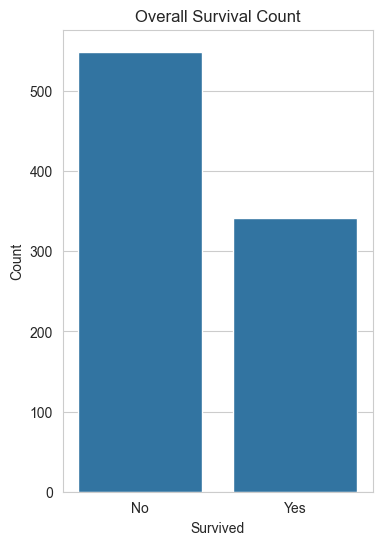

In [14]:
# Calculate the overall survival rate 
survival_rate = df['survived'].mean()*100
print(f"Overall survival rate is:{survival_rate:.2f} % ")

# Create a countplot to visualize it
plt.figure(figsize=(4,6))
sb.countplot(x='survived', data=df)
plt.title('Overall Survival Count')
plt.xlabel('Survived')
print('\n')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.show()

Question 2: Did gender influence survival?

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


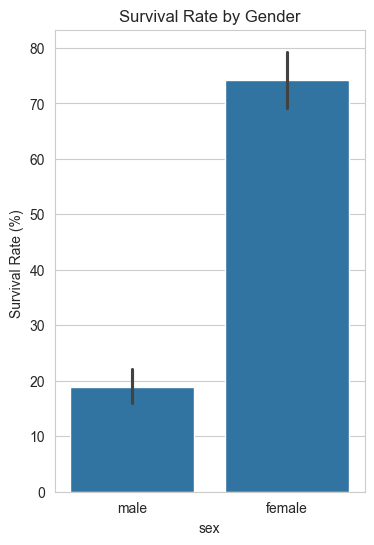

In [16]:
# Calculate the survival rate by gender
gender_survival = df.groupby('sex')['survived'].mean()*100
print(gender_survival)
# Create a visual comparison
plt.figure(figsize=(4,6))
sb.barplot(x='sex', y='survived', data=df, estimator=lambda x: sum(x)*100/len(x))
plt.title("Survival Rate by Gender")
plt.xlabel("sex")
plt.ylabel("Survival Rate (%) ")
plt.show()

Interpretation: The numbers and bar chart will show a dramatically higher survival rate for females. "Women and children first" was a real policy

Question 3: Did passerger class influence survival?

C:\Users\bpsgr\AppData\Local\Temp\ipykernel_21356\3435295579.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_survival = df.groupby('pclass')['survived'].mean()*100


pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


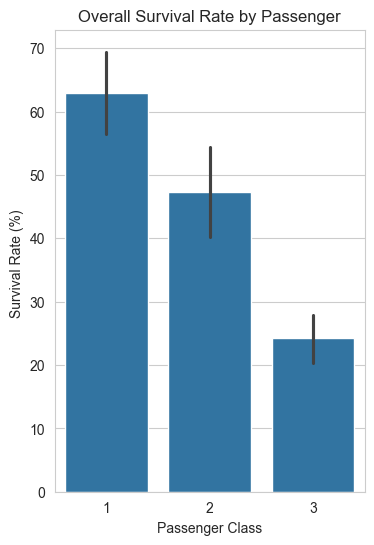

In [21]:
# Calculate the survival rate by passenger cclassmethod
passenger_survival = df.groupby('pclass')['survived'].mean()*100
print(passenger_survival)

# Create a visuale comparison
plt.figure(figsize=(4,6))
sb.barplot(x='pclass', y='survived', data=df, estimator= lambda x: sum(x)*100/len(x))
plt.title("Overall Survival Rate by Passenger")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%) ")
plt.show()

Interpretation: You'll see a clear trend: 1st class > 2nd class > 3rd class. Wealth and status had a significant impact.

# "How did passenger class AND gender together influence survival?"

survived           False      True 
pclass sex                         
1      female   3.191489  96.808511
       male    63.114754  36.885246
2      female   7.894737  92.105263
       male    84.259259  15.740741
3      female  50.000000  50.000000
       male    86.455331  13.544669


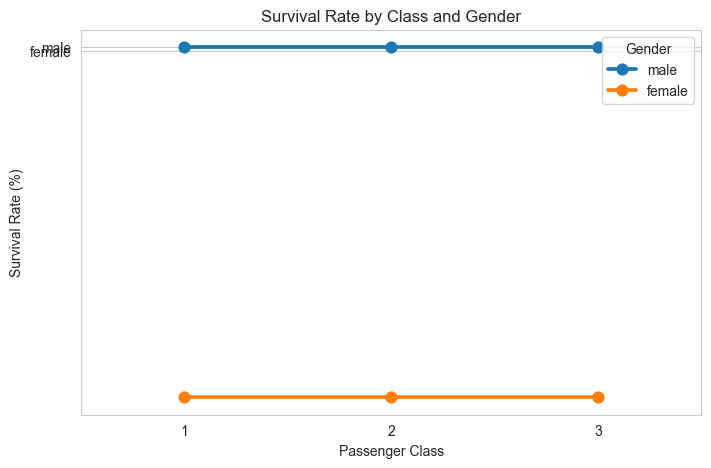

In [23]:
# A more powerful analysis: cross-tabulation
cross_tabulation = pd.crosstab(index=[df['pclass'], df['sex']], columns=df['survived'], normalize='index')*100
print(cross_tabulation)

# The best way to visualize this is to use a pointplot
plt.figure(figsize=(8,5))
sb.pointplot(x='pclass', y='sex', hue='sex',data=df, estimator= lambda x: sum(x)*100/len(x) )
plt.title("Survival Rate by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.legend(title="Gender")
plt.show()

Interpretation: This is the most powerful insight. It shows that within every class, women had a higher survival rate. But a 3rd class female had a similar chance as a 1st class male! This tells a complete story.

# Additional Exploration

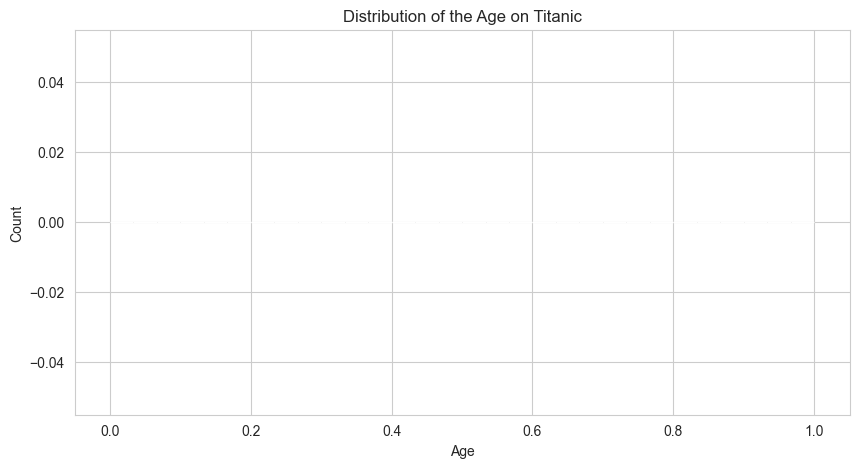

In [25]:
# Distribution of Age
plt.figure(figsize=(10,5))
df['age'].hist(bins=30)
plt.title("Distribution of the Age on Titanic")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Distribution of Age, separated by Survival

Check1: survived
False    549
True     342
Name: count, dtype: int64
Check2: 891


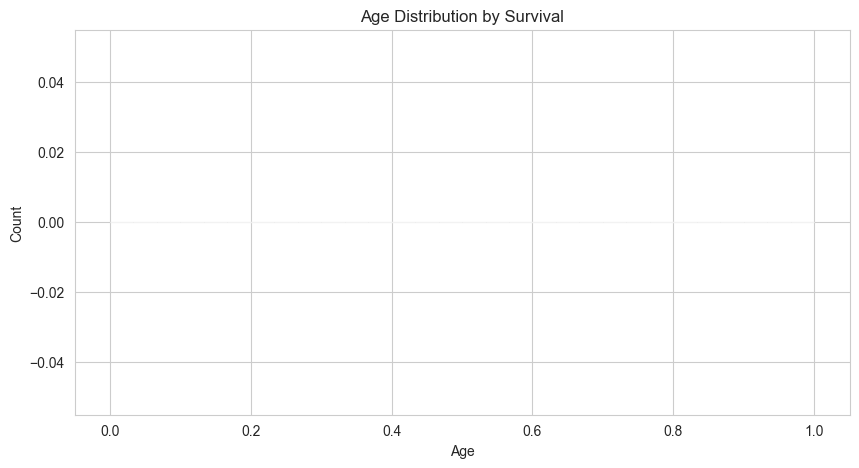

In [29]:
plt.figure(figsize=(10,5))
df[df['survived']==True]['age'].hist(bins=30, alpha=0.5, label='survived', color='green')
print("Check1:", df['survived'].value_counts())
print("Check2:", df['age'].isna().sum())
df[df['survived']==False]['age'].hist(bins=30, alpha=0.5, label='Did Not Survived', color='red')

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

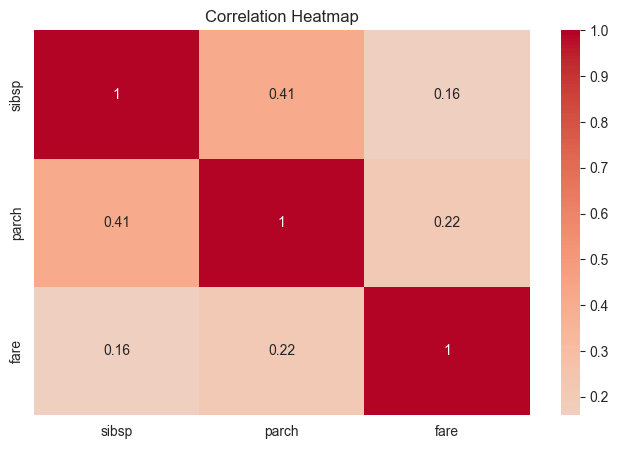

In [30]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,5))
sb.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

## Conclusion

The analysis clearly shows that survival on the Titanic was strongly linked to socio-economic factors (passenger class) and gender.

*   **Overall survival rate** was **38.38%**.
*   **Gender was a major factor:** 74.2% of females survived vs. only 18.89% of males.
*   **Class was a major factor:** 62.96% of 1st class passengers survived, compared to only 24.24% of 3rd class.
*   The combination of both factors reveals the full story: **A female in 1st class had a extremely high chance of survival, while a male in 3rd class had a very low chance.**